## Ammonia Data Analysis

### A basic analysis to outline import and export data for Ammonia HS 2814 based on UN Comtrade Data 2023


#This data is from commtrade https://comtradeplus.un.org/

In [77]:
import pandas as pd
import squarify
import matplotlib.pyplot as plt

In [353]:
file_path = "/Users/Work/NoteBooks/Energy/TradeData_9_16_2024_22_24_30.csv"


In [354]:
try:
    df = pd.read_csv(file_path, encoding='utf=8', index_col=False)
except UnicodeDecodeError:
    print("Error: Unable to decode the file with UTF-8 encoding.")
    try: 
        df = pd.read_csv(file_path, encoding='ISO-8859-1', index_col=False)
    except Exception as e:
        print("still no joy")
        prting(str(e))

Error: Unable to decode the file with UTF-8 encoding.


In [355]:
df.head()

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,...,netWgt,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate
0,C,A,20230101,2023,52,2023,20,AND,Andorra,M,...,94.00,False,0.0,False,63.825,NaN,63.825,0,False,True
1,C,A,20230101,2023,52,2023,28,ATG,Antigua and Barbuda,M,...,4443.89,False,0.0,False,14488.667,NaN,14488.667,0,False,True
2,C,A,20230101,2023,52,2023,31,AZE,Azerbaijan,M,...,193970.82,False,0.0,False,161381.580,NaN,161381.580,0,False,True
3,C,A,20230101,2023,52,2023,32,ARG,Argentina,M,...,1829.78,False,0.0,False,17424.150,16649.69,17424.150,0,False,True
4,C,A,20230101,2023,52,2023,32,ARG,Argentina,X,...,77300.60,False,0.0,False,NaN,56088.20,56088.200,0,False,True


In [357]:
df["reporterDesc"] = df["reporterDesc"].replace({"Philippines" : "Phil", "China, Hong Kong SAR" : "Hong Kong, CH", "United Arab Emirates" : "UAE", "Romania" : "Rom."})

In [361]:
df["netWgt"].fillna(0, inplace=True)

In [362]:
df["netWgt"].isna().sum()

0

In [363]:
#change format of numbers to be readable
for col in ["primaryValue","netWgt"]:
    df[col] = df[col].apply(lambda x: "{:.0f}".format(x))


In [364]:
#convert the string numbers to integers
for col in ["primaryValue","netWgt"]:
    df[col] = df[col].astype(int)

### Calculations in USD

In [365]:
#set up df for imports and exports
imports = df[df["flowCode"] == "M"] 
exports = df[df["flowCode"] == "X"] 

#### Total Value of Imports

In [414]:
import_val = imports["primaryValue"].sum()
f'The total value of imports is ${import_val:,.0f}'

'The total value of imports is $7,827,879,935'

#### Top Importers in terms of USD spent on imports

In [366]:
Top30 = imports.sort_values("primaryValue", ascending = False)

In [394]:
Top30 = Top30.iloc[:20]

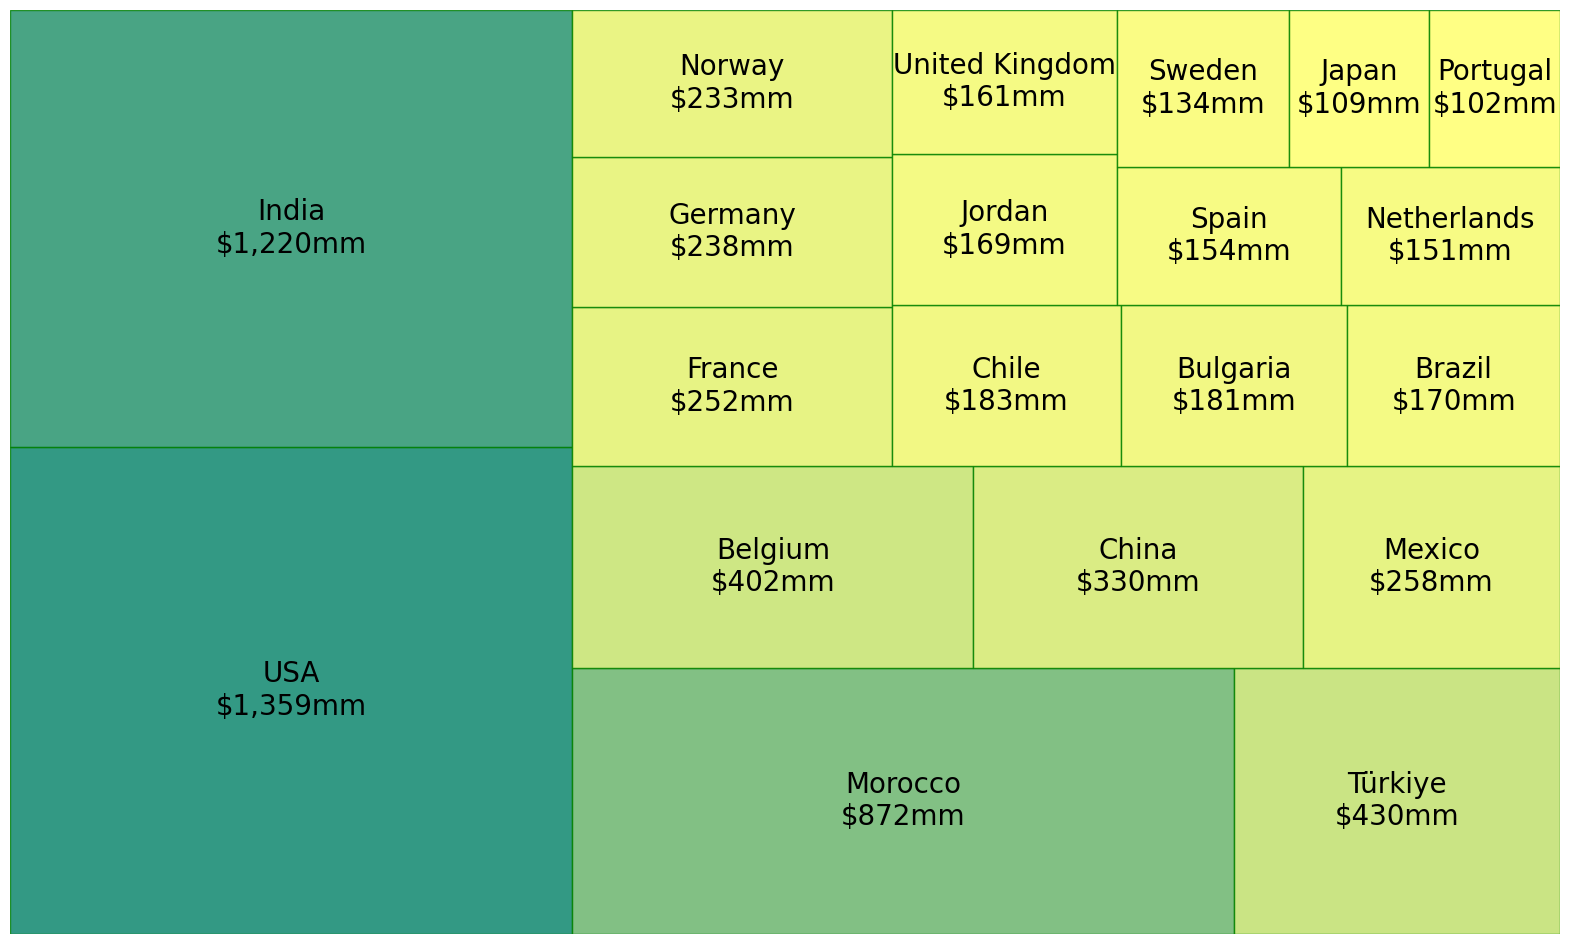

In [441]:
millions = Top30['primaryValue'] / 1e6

# Normalize the values for plotting
norm = plt.Normalize(millions.min(), millions.max())
colors = plt.cm.summer_r(norm(millions))
plt.rcParams.update({'font.size': 20})

# Create data labels
labels = [f'{dest}\n${value:,.0f}mm' for dest, value in zip(Top30['reporterDesc'], millions)]

# Create the plot
fig, ax = plt.subplots(1, figsize=(20, 12))
ax.set_facecolor('black')
squarify.plot(sizes=millions, label=labels, alpha=.8, color=colors, edgecolor='green')
plt.axis('off')
plt.savefig("Ammonia Imports 2023.jpg", format='jpeg')
plt.show()

#### Top Exporters in terms of money received for exports

In [399]:
Top30_Exp = exports.sort_values("primaryValue", ascending = False)
Top30_Exp = Top30_Exp.iloc[:15]`

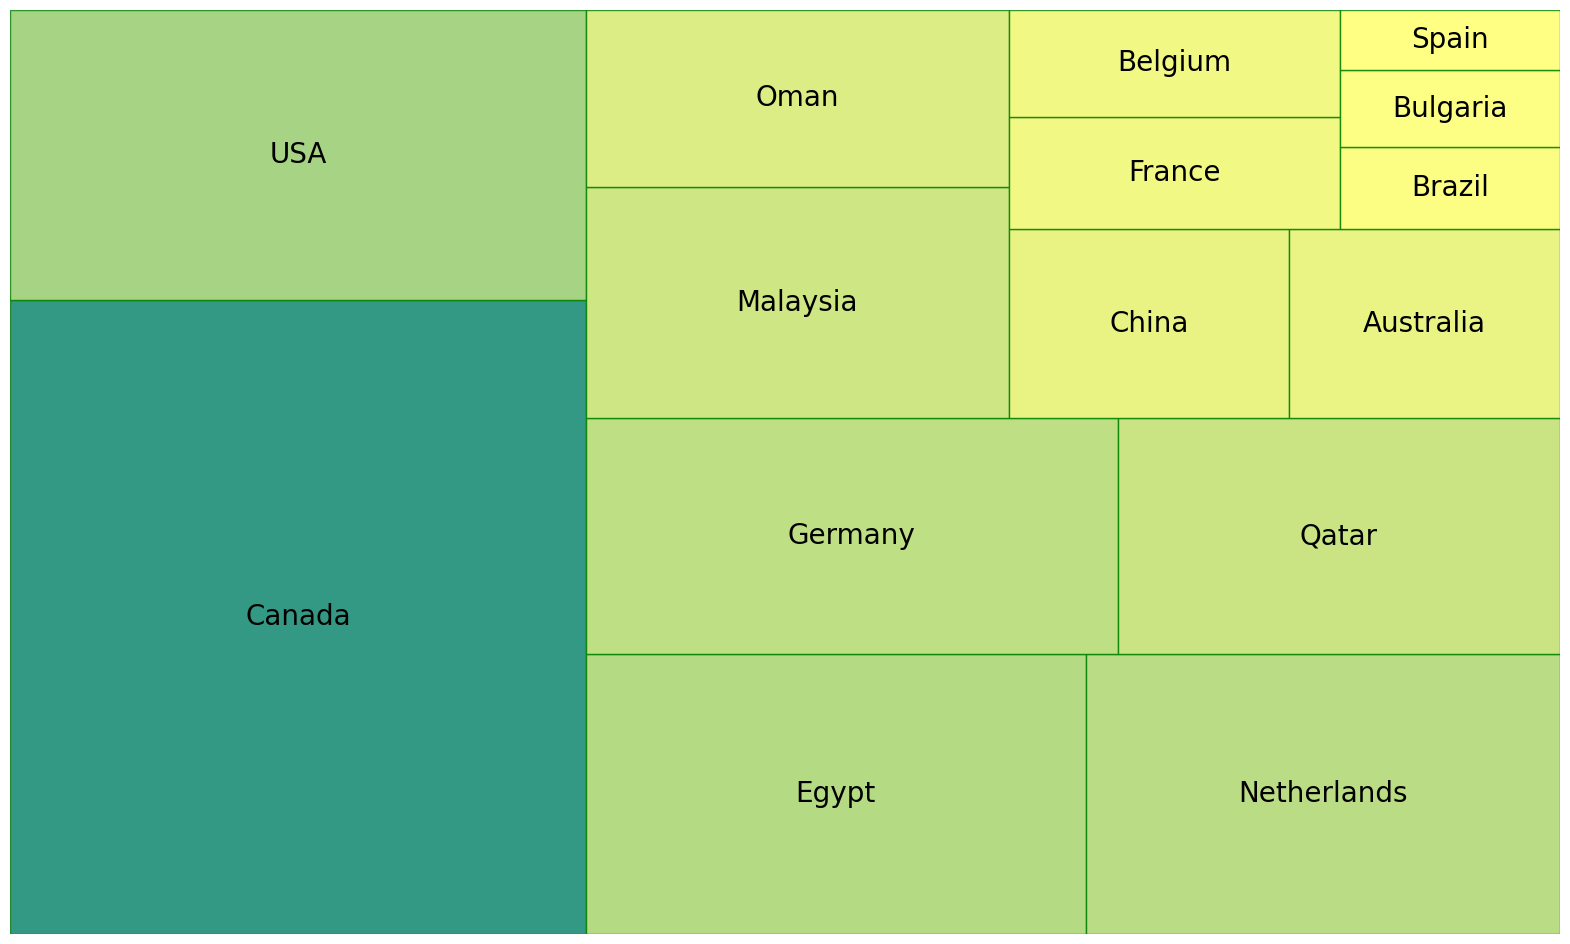

In [400]:
# Normalize the values for plotting
norm = plt.Normalize(Top30_Exp['primaryValue'].min(), Top30_Exp['primaryValue'].max())
colors = plt.cm.summer_r(norm(Top30_Exp['primaryValue']))
plt.rcParams.update({'font.size': 20})


# Create the plot
fig, ax = plt.subplots(1, figsize = (20,12))
ax.set_facecolor('black')
squarify.plot(sizes=Top30_Exp['primaryValue'], label=Top30_Exp['reporterDesc'], alpha=.8, color=colors, edgecolor='green')
plt.axis('off')
plt.savefig("Ammonia Exports 2023.jpg", format='jpeg')
plt.show()


### Calculate the net kg

In [388]:
# Group by 'reporterDesc' and 'flowCode' and sum 'netWgt'
grouped_import = df.groupby(['reporterDesc', 'flowCode'])['netWgt'].sum().unstack()
grouped_export = df.groupby(['reporterDesc', 'flowCode'])['netWgt'].sum().unstack()


# Calculate net amount
grouped_import['netAmount'] = grouped['M'] - grouped['X']
grouped_export['netAmount'] = grouped['X'] - grouped['M']

# Reset index
grouped_import.reset_index(inplace=True)
grouped_export.reset_index(inplace=True)

In [389]:
grouped_import = grouped_import.sort_values("netAmount",ascending=False)
grouped_export = grouped_export.sort_values("netAmount",ascending=False)


In [407]:
top_net_importers = grouped_import.iloc[: 20]
top_net_exporters = grouped_export.iloc[: 11]

### Net Importers by kg

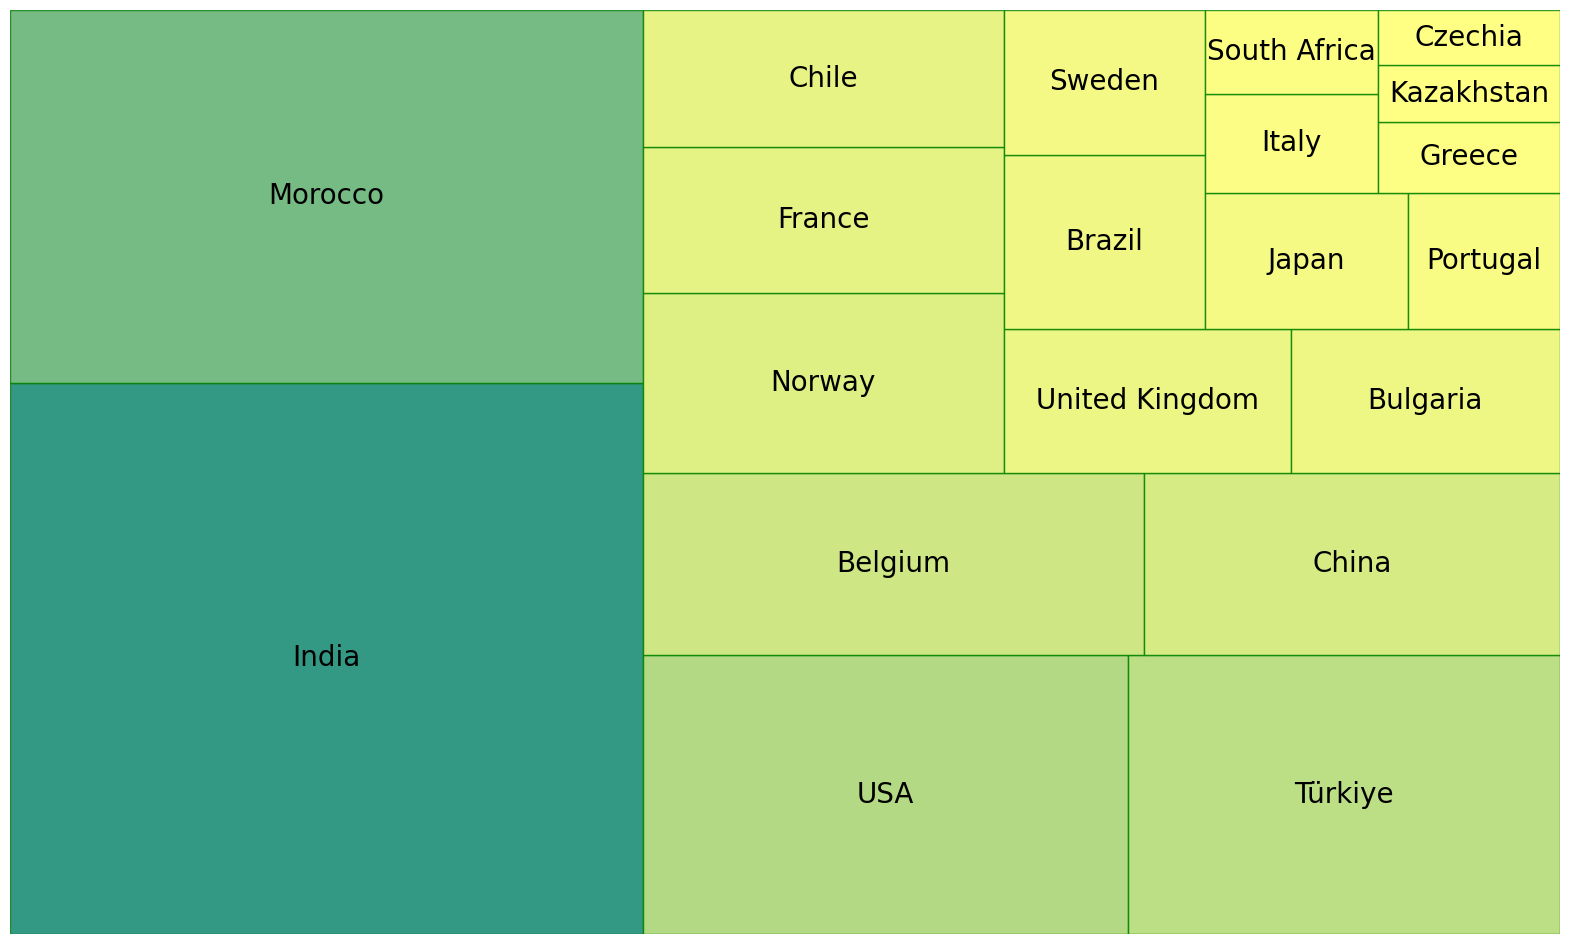

In [401]:
# Normalize the values for plotting
norm = plt.Normalize(top_net_importers['netAmount'].min(), top_net_importers['netAmount'].max())
colors = plt.cm.summer_r(norm(top_net_importers['netAmount']))
plt.rcParams.update({'font.size': 20})


# Create the plot
fig, ax = plt.subplots(1, figsize = (20,12))
ax.set_facecolor('black')
squarify.plot(sizes=top_net_importers['netAmount'], label=top_net_importers['reporterDesc'], alpha=.8, color=colors, edgecolor='green')
plt.axis('off')
plt.savefig("Ammonia Importers kg 2023.jpg", format='jpeg')
plt.show()


### Top net exporters kg 

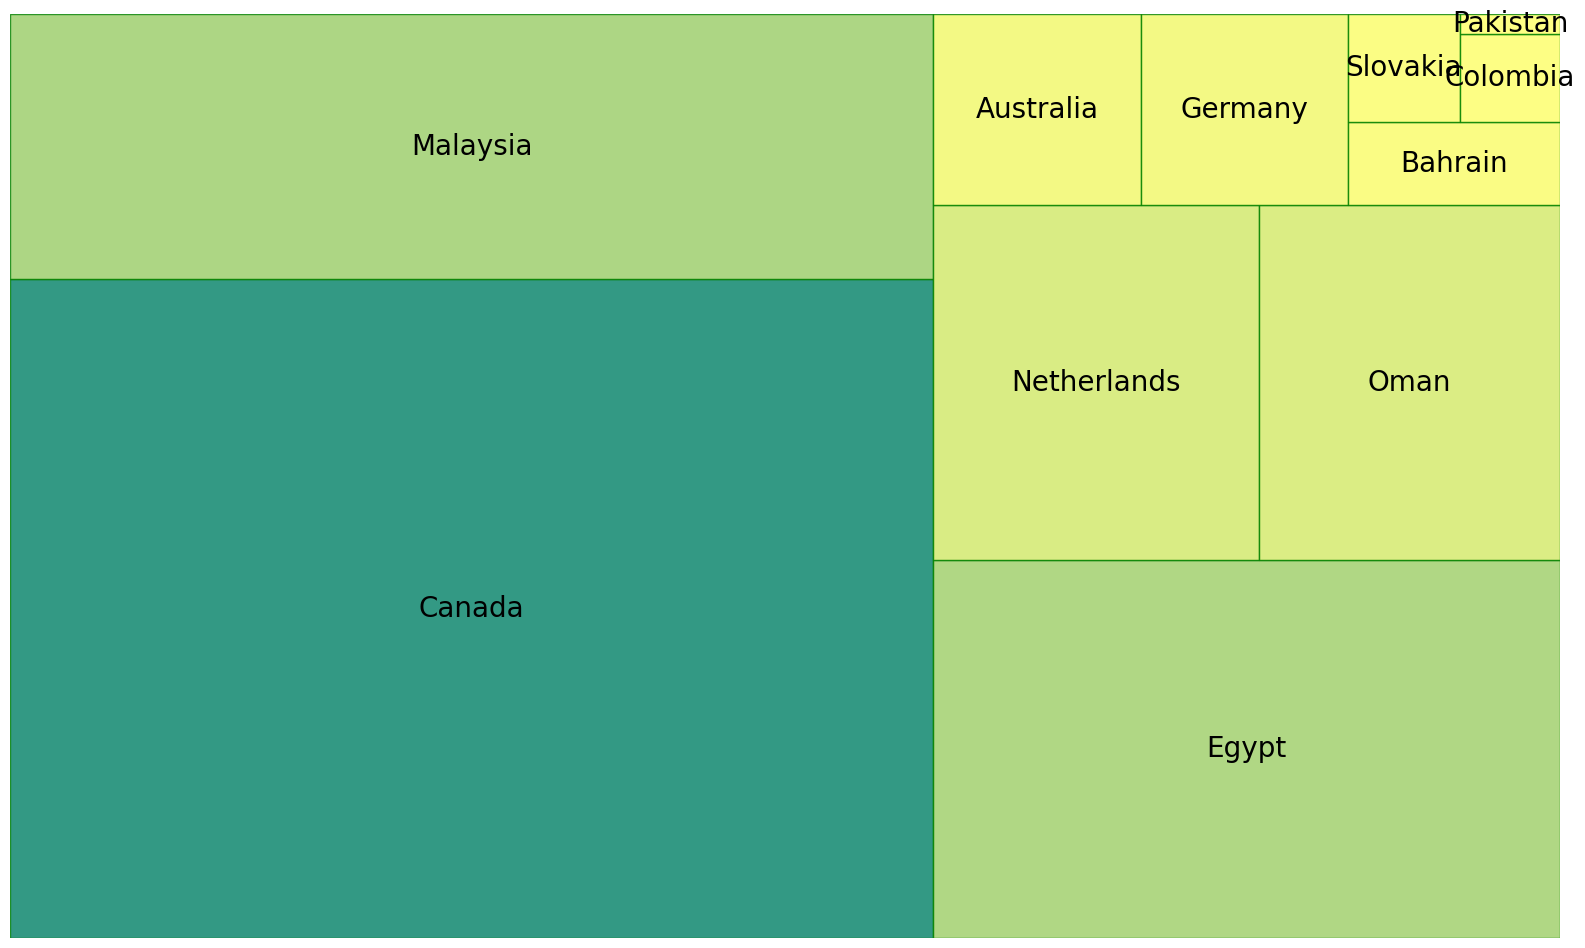

In [408]:
norm = plt.Normalize(top_net_exporters['netAmount'].min(), top_net_exporters['netAmount'].max())
colors = plt.cm.summer_r(norm(top_net_exporters['netAmount']))
plt.rcParams.update({'font.size': 20})


# Create the plot
fig, ax = plt.subplots(1, figsize = (20,12))
ax.set_facecolor('black')
squarify.plot(sizes=top_net_exporters['netAmount'], label=top_net_exporters['reporterDesc'], alpha=.8, color=colors, edgecolor='green')
plt.axis('off')
plt.savefig("Ammonia Exports KG 2023.jpg", format='jpeg')
plt.show()
